In [76]:
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [77]:
# Load the data
hitters = pd.read_csv("C:/Users/Krist/OneDrive - Aarhus Universitet/Dokumenter/Computerteknologi/2. semester/Decision Support Systems/Data/Hitters.csv", index_col=0).dropna()
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-Willie McGee,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
-Willie Randolph,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
-Willie Upshaw,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


First the Salary variable must be removed from the data set and stored in a vector. The variables "League", "Division" and "NewLeague" contain non-numerical values which is a problem. These are replaced with dummy variables.

In [78]:
y = hitters.Salary

In [79]:
dummies = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])
dummies

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
-Alan Ashby,0,1,0,1,0,1
-Alvin Davis,1,0,0,1,1,0
-Andre Dawson,0,1,1,0,0,1
-Andres Galarraga,0,1,1,0,0,1
-Alfredo Griffin,1,0,0,1,1,0
...,...,...,...,...,...,...
-Willie McGee,0,1,1,0,0,1
-Willie Randolph,1,0,1,0,1,0
-Wayne Tolleson,1,0,0,1,1,0
-Willie Upshaw,1,0,1,0,1,0


In [80]:
# Remove salary and the problematic variables from set
x_temp = hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Insert dummy variables in data set
x = pd.concat([x_temp, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
x

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
-Alan Ashby,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
-Alvin Davis,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
-Andre Dawson,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
-Andres Galarraga,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
-Alfredo Griffin,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-Willie McGee,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
-Willie Randolph,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
-Wayne Tolleson,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
-Willie Upshaw,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


# 6.6.1 ridge regression

The lambda value is called alpha in sklearns model. An array of lambda values are generated and used to tune the model. The result is plotted and it can be seen that the coefficient weights are smaller when lambda is large. 

Text(0, 0.5, 'weights')

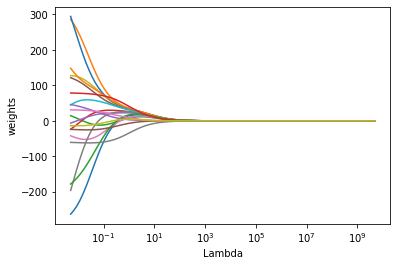

In [97]:
lambdas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge(normalize=True)
coefs = []

for a in lambdas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(x), y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Lambda')
plt.ylabel('weights')

The samples are split into training set and test set

In [113]:
X_train, X_test , y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

In [114]:
ridge2 = Ridge(alpha=4, normalize=True)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=x.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2)) # Calculate the test MSE

AtBat           0.098658
Hits            0.446094
HmRun           1.412107
Runs            0.660773
RBI             0.843403
Walks           1.008473
Years           2.779882
CAtBat          0.008244
CHits           0.034149
CHmRun          0.268634
CRuns           0.070407
CRBI            0.070060
CWalks          0.082795
PutOuts         0.104747
Assists        -0.003739
Errors          0.268363
League_N        4.241051
Division_W    -30.768885
NewLeague_N     4.123474
dtype: float64
106216.52238005561


In [115]:
ridge3 = Ridge(alpha=10**10, normalize=True)
ridge3.fit(X_train, y_train) # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index=x.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3)) # Calculate the test MSE

AtBat          1.317464e-10
Hits           4.647486e-10
HmRun          2.079865e-09
Runs           7.726175e-10
RBI            9.390640e-10
Walks          9.769219e-10
Years          3.961442e-09
CAtBat         1.060533e-11
CHits          3.993605e-11
CHmRun         2.959428e-10
CRuns          8.245247e-11
CRBI           7.795451e-11
CWalks         9.894387e-11
PutOuts        7.268991e-11
Assists       -2.615885e-12
Errors         2.084514e-10
League_N      -2.501281e-09
Division_W    -1.549951e-08
NewLeague_N   -2.023196e-09
dtype: float64
172862.23580379886


In [116]:
ridge2 = Ridge(alpha=0, normalize=True)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
pred = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=x.columns)) # Print coefficients
print(mean_squared_error(y_test, pred)) # Calculate the test MSE

AtBat           -1.821115
Hits             4.259156
HmRun           -4.773401
Runs            -0.038760
RBI              3.984578
Walks            3.470126
Years            9.498236
CAtBat          -0.605129
CHits            2.174979
CHmRun           2.979306
CRuns            0.266356
CRBI            -0.598456
CWalks           0.171383
PutOuts          0.421063
Assists          0.464379
Errors          -6.024576
League_N       133.743163
Division_W    -113.743875
NewLeague_N    -81.927763
dtype: float64
116690.46856660453


Use cross-validation to choose alpha

In [117]:
ridgecv = RidgeCV(alphas=lambdas, scoring="neg_mean_squared_error", normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.5748784976988678

In [118]:
ridge4 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

99825.6489629273

In [119]:
ridge4.fit(x, y)
pd.Series(ridge4.coef_, index=x.columns)

AtBat           0.055838
Hits            0.934879
HmRun           0.369048
Runs            1.092480
RBI             0.878259
Walks           1.717770
Years           0.783515
CAtBat          0.011318
CHits           0.061101
CHmRun          0.428333
CRuns           0.121418
CRBI            0.129351
CWalks          0.041990
PutOuts         0.179957
Assists         0.035737
Errors         -1.597699
League_N       24.774519
Division_W    -85.948661
NewLeague_N     8.336918
dtype: float64

# Lab 6.6.2 Lasso

Text(0, 0.5, 'weights')

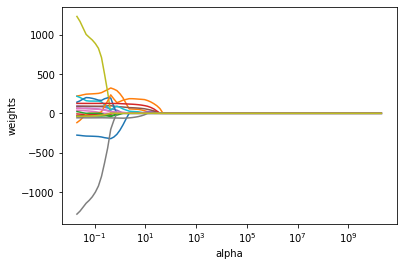

In [123]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("weights")

In [124]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

104960.65853895503

In [126]:
pd.Series(lasso.coef_, index=x.columns)

AtBat           0.000000
Hits            1.082446
HmRun           0.000000
Runs            0.000000
RBI             0.000000
Walks           2.906388
Years           0.000000
CAtBat          0.000000
CHits           0.000000
CHmRun          0.219367
CRuns           0.000000
CRBI            0.513975
CWalks          0.000000
PutOuts         0.368401
Assists        -0.000000
Errors         -0.000000
League_N        0.000000
Division_W    -89.064338
NewLeague_N     0.000000
dtype: float64